# **Supervised**

In [ ]:
# Filter y to match the rows in df_clean
y_filtered = y.loc[df_clean.index]

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered
)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42)  # probability=True for ROC
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)


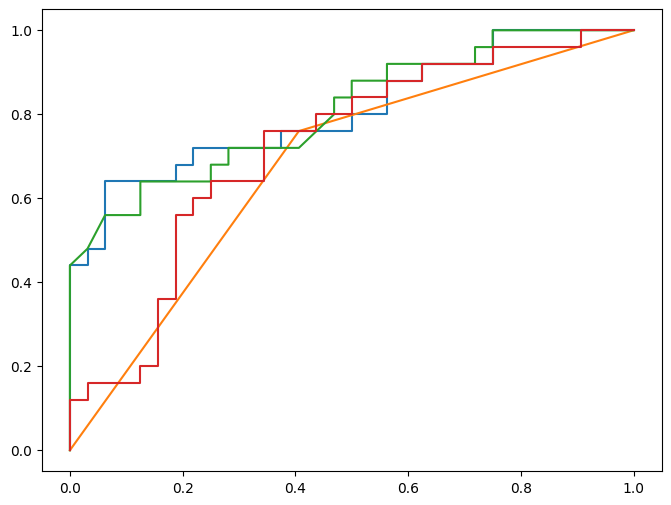

In [ ]:
results = []
plt.figure(figsize=(8,6))

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1,
        'AUC': auc_score
    })

    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

In [ ]:
results_df = pd.DataFrame(results)
results_df = results_df[['Model','Accuracy','Precision','Recall','F1-score','AUC']]
results_df

,Model,Accuracy,Precision,Recall,F1-score,AUC
0,Logistic Regression,0.789474,0.842105,0.64,0.727273,0.807500
1,Decision Tree,0.666667,0.593750,0.76,0.666667,0.676875
2,Random Forest,0.701754,0.653846,0.68,0.666667,0.809375
3,SVM,0.666667,0.666667,0.48,0.558140,0.720000


In [ ]:
for name, model in models.items():
    print(f"{name} ")
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, digits=3)
    print(report)

Logistic Regression 
              precision    recall  f1-score   support

           0      0.763     0.906     0.829        32
           1      0.842     0.640     0.727        25

    accuracy                          0.789        57
   macro avg      0.803     0.773     0.778        57
weighted avg      0.798     0.789     0.784        57

Decision Tree 
              precision    recall  f1-score   support

           0      0.760     0.594     0.667        32
           1      0.594     0.760     0.667        25

    accuracy                          0.667        57
   macro avg      0.677     0.677     0.667        57
weighted avg      0.687     0.667     0.667        57

Random Forest 
              precision    recall  f1-score   support

           0      0.742     0.719     0.730        32
           1      0.654     0.680     0.667        25

    accuracy                          0.702        57
   macro avg      0.698     0.699     0.698        57
weighted avg      0.703